# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE

url ="http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # YOUR CODE HERE
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | sao joao da barra
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | uliastay
Processing Record 7 of Set 1 | sao tome
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | santiago de cao
Processing Record 12 of Set 1 | letlhakane
Processing Record 13 of Set 1 | kingisepp
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | mossel bay
Processing Record 40 of Set 4 | challapata
Processing Record 41 of Set 4 | kosh-agach
Processing Record 42 of Set 4 | badger
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | utrik
Processing Record 45 of Set 4 | island harbour
Processing Record 46 of Set 4 | feijo
Processing Record 47 of Set 4 | suileng
Processing Record 48 of Set 4 | gunjur
Processing Record 49 of Set 4 | yamada
Processing Record 0 of Set 5 | altai
Processing Record 1 of Set 5 | petropavlovsk-kamchatsky
Processing Record 2 of Set 5 | miranda
Processing Record 3 of Set 5 | remire-montjoly
Processing Record 4 of Set 5 | alta
Processing Record 5 of Set 5 | dolisie
Processing Record 6 of Set 5 | jeddah
Processing Record 7 of Set 5 | kargasok
Processing Record 8 of Set 5 | cromwell
Processing Record 9 of Set 5 | linghai
Processing Record 10 of Set 5 | chinde
Processing Record 11 of Set 5 | kudahuvadhoo
Processing Record 12 of Set 5 | castillos
Processing Re

Processing Record 34 of Set 8 | newman
Processing Record 35 of Set 8 | obo
Processing Record 36 of Set 8 | holualoa
Processing Record 37 of Set 8 | daru
Processing Record 38 of Set 8 | qamdo
Processing Record 39 of Set 8 | tionk essil
Processing Record 40 of Set 8 | galle
Processing Record 41 of Set 8 | khash
Processing Record 42 of Set 8 | usogorsk
Processing Record 43 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 44 of Set 8 | saudarkrokur
Processing Record 45 of Set 8 | jinghong
Processing Record 46 of Set 8 | slonim
Processing Record 47 of Set 8 | hirara
Processing Record 48 of Set 8 | smithers
Processing Record 49 of Set 8 | marco island
Processing Record 0 of Set 9 | ishim
Processing Record 1 of Set 9 | nikolayevsk-on-amure
Processing Record 2 of Set 9 | wau
Processing Record 3 of Set 9 | pratt
Processing Record 4 of Set 9 | alofi
Processing Record 5 of Set 9 | magong
Processing Record 6 of Set 9 | mogocha
Processing Record 7 of Set 9 | new norfolk
Processin

Processing Record 26 of Set 12 | inyonga
Processing Record 27 of Set 12 | linares
Processing Record 28 of Set 12 | callao
Processing Record 29 of Set 12 | suva
Processing Record 30 of Set 12 | kuta
Processing Record 31 of Set 12 | turabah
Processing Record 32 of Set 12 | vikravandi
Processing Record 33 of Set 12 | dellys
Processing Record 34 of Set 12 | caconda
Processing Record 35 of Set 12 | umea
Processing Record 36 of Set 12 | kovalam
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.61,91,100,13.14,SH,1697045122
1,albany,42.6001,-73.9662,18.10,55,99,0.89,US,1697045208
2,enewetak,11.3474,162.3373,28.52,77,39,5.81,MH,1697045234
3,sao joao da barra,-21.6403,-41.0511,28.05,84,81,3.74,BR,1697045053
4,ust-nera,64.5667,143.2000,-13.77,99,80,1.34,RU,1697045234


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.61,91,100,13.14,SH,1697045122
1,albany,42.6001,-73.9662,18.10,55,99,0.89,US,1697045208
2,enewetak,11.3474,162.3373,28.52,77,39,5.81,MH,1697045234
3,sao joao da barra,-21.6403,-41.0511,28.05,84,81,3.74,BR,1697045053
4,ust-nera,64.5667,143.2000,-13.77,99,80,1.34,RU,1697045234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

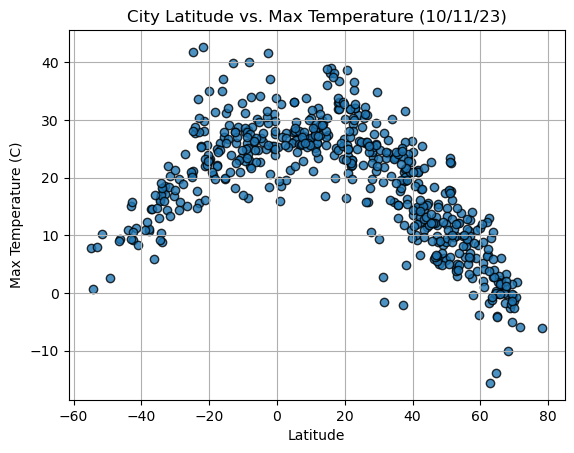

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

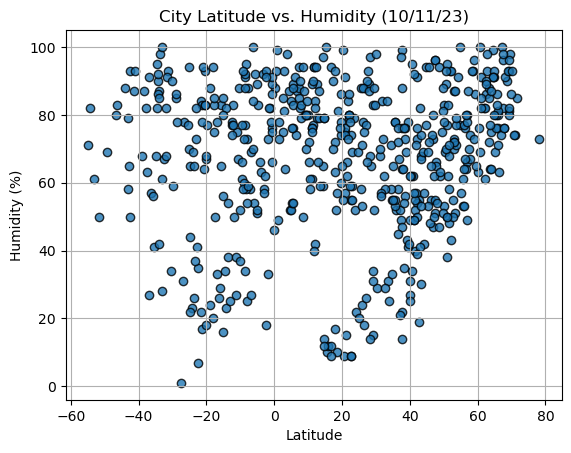

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
humidity = city_data_df["Humidity"]
plt.scatter(lats , humidity , edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

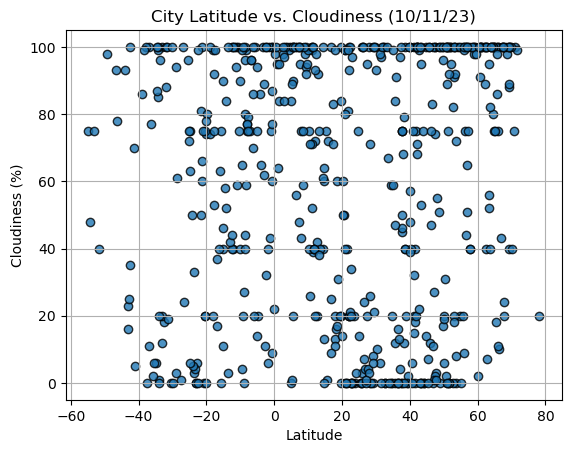

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

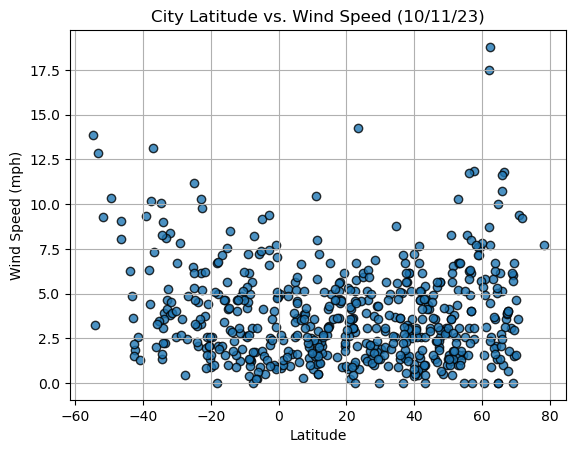

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
wind_speed =city_data_df["Wind Speed"]
plt.scatter(lats,wind_speed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values,title,text_coordinates ):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,18.10,55,99,0.89,US,1697045208
2,enewetak,11.3474,162.3373,28.52,77,39,5.81,MH,1697045234
4,ust-nera,64.5667,143.2000,-13.77,99,80,1.34,RU,1697045234
5,uliastay,47.7417,96.8444,4.97,66,3,2.57,MN,1697045235
6,sao tome,0.3365,6.7273,25.30,88,98,4.95,ST,1697045235


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.61,91,100,13.14,SH,1697045122
3,sao joao da barra,-21.6403,-41.0511,28.05,84,81,3.74,BR,1697045053
10,santiago de cao,-7.9589,-79.2392,22.07,73,77,5.66,PE,1697045236
11,letlhakane,-21.4167,25.5833,29.85,17,60,1.96,BW,1697045236
14,waitangi,-43.9535,-176.5597,11.01,88,93,6.26,NZ,1697045236


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7142253923959062


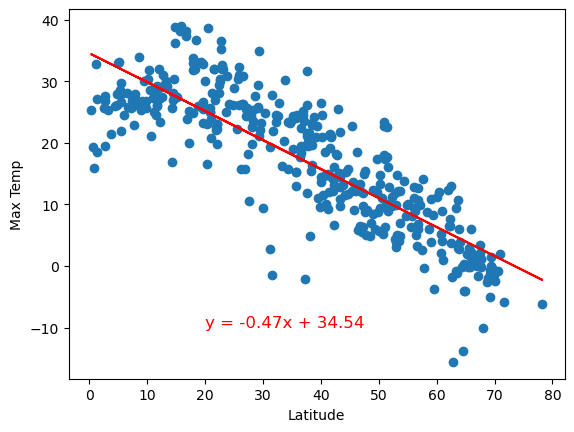

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,"Max Temp",(20,-10))

The r-value is: 0.5418149841552723


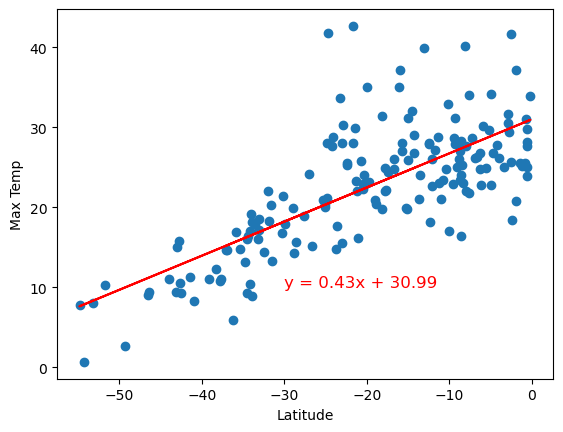

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,10 ))

**Discussion about the linear relationship:** 

The r-value is  0.7142253923959062 on Northern Hemisphere, which means there is a moderate strong positive linear relationship between latitude and maximum temperature. This means that as the latitude increases, the maximum temperature also tends to increase.also on Southern Hemisphere r-value is 0.5418149841552723 indicates a moderate positive linear relationship, meaning that as latitude increases, so does the maximum temperature, but not very strongly.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01541222590591779


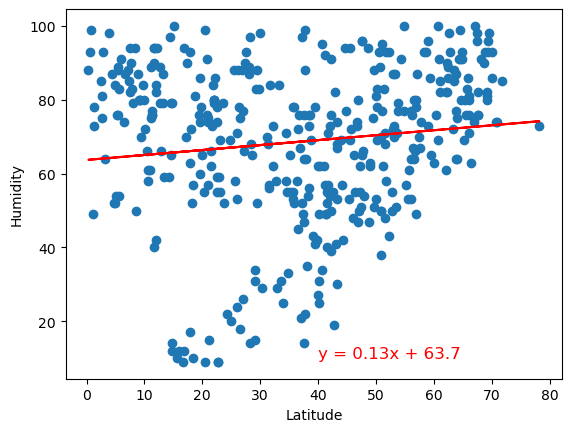

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.0033306188713325253


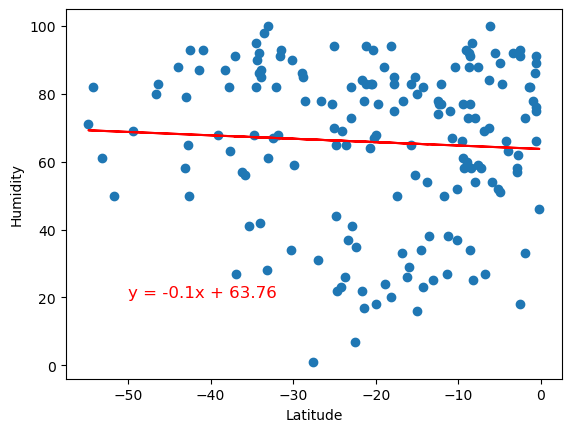

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** 

The r-value is 0.01541222590591779 on Northern Hemisphere and The r-value is  0.0033306188713325253 on Southern Hemisphere both values very close to zero, which means there is no strong relationship between latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008209123782862399


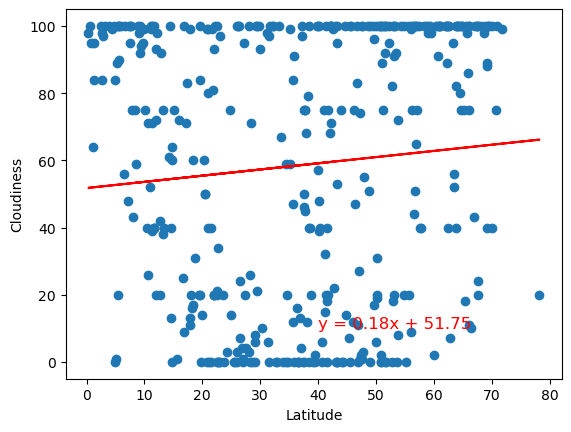

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.012787935964698276


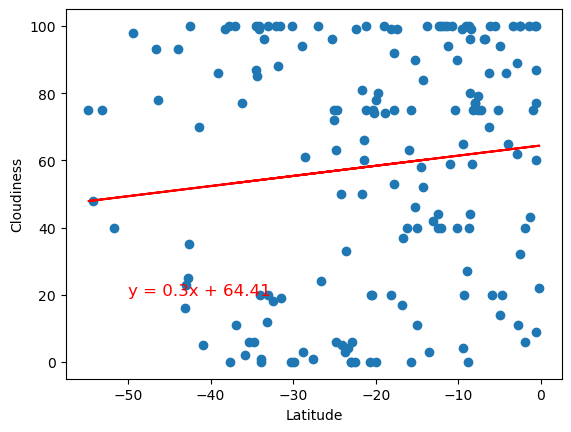

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,20))

**Discussion about the linear relationship:

The r-value is 0.008209123782862399 on Northern Hemisphere and The r-value is 0.012787935964698276 on Southern Hemisphere both values very close to zero, which means there is no strong relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03968765492162579


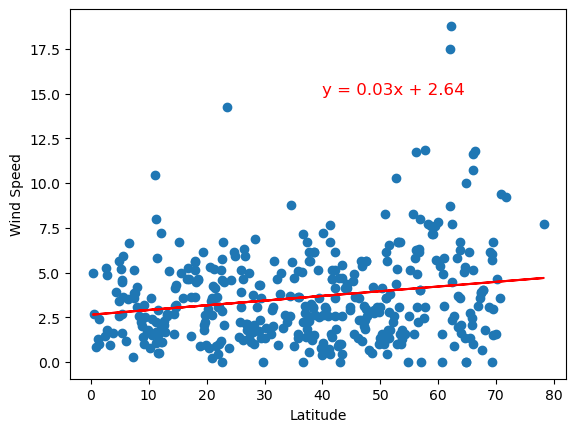

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,15))

The r-value is: 0.10906483515710354


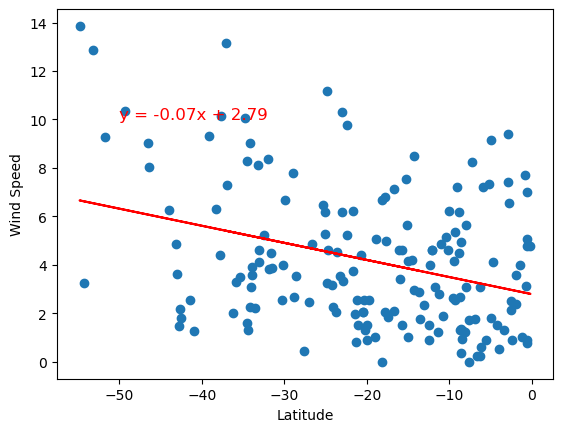

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 10))


**Discussion about the linear relationship:

Based on r-value of0.10906483515710354 on Southern Hemisphere, it seems that there is no strong linear relationship between latitude and wind speed. This means that knowing the latitude of a place does not help much in predicting its wind speed, or vice versa.on Northern HemisphereBased the r-value is 0.03968765492162579 ,There is no strong linear relationship between latitude and wind speed. This means that the wind speed does not depend much on the latitude of a location.
